In [89]:
import matplotlib.pyplot as plt
from sympy.utilities.lambdify import lambdify
import numpy as np
import pandas as pd
import sympy
import math
%matplotlib inline

### functions in python
### f(x) = x²

In [7]:
def power_f(x):
    result = x**2

    return result


print(power_f(3))

9


In [8]:
def der_f(x):
    return 2*x

### Derivative of exponent terms

In [10]:
def derivative(base, power):
    return f"{power} {base}^{power - 1}"

derivative(base="X", power=2)

'2 X^1'

In [11]:
derivative(base="Y", power=3)


'3 Y^2'

In [14]:
""" 3 Y^2 """

mat1 = np.array([2, 3, 5, 6])

power_f(mat1)

array([ 4,  9, 25, 36])

In [15]:
derivative(base=mat1, power=2)

'2 [2 3 5 6]^1'

### plot function and its derivative 

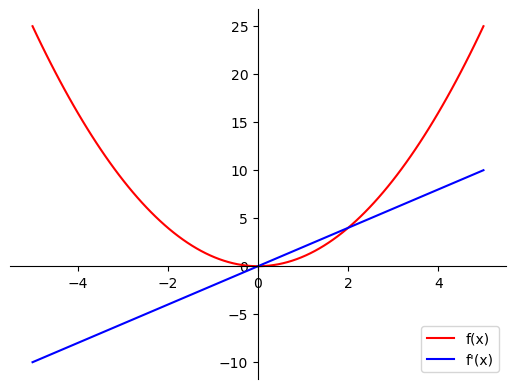

In [16]:
def plot_funcs(power_f, der_f=None, x_min=-5, x_max=5, label1="f(x)", label2="f'(x)"):

    x = np.linspace(x_min, x_max, 100)

    # Setting the axes at the centre.
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.plot(x, power_f(x), 'r', label=label1)
    if not der_f is None:
        # If f2 is an array, it is passed as it is to be plotted as unlinked points.
        # If f2 is a function, f2(x) needs to be passed to plot it.
        if isinstance(der_f, np.ndarray):
            plt.plot(x, der_f, 'bo', markersize=3, label=label2, )
        else:
            plt.plot(x, der_f(x), 'b', label=label2)
    plt.legend()

    plt.show()


plot_funcs(power_f, der_f)

### Symbolic Computation with `sympy`


In [17]:
approx = math.sqrt(18)
approx

4.242640687119285

In [18]:
exact = sympy.sqrt(18)
exact

3*sqrt(2)

In [19]:
approx1 = sympy.N(sympy.sqrt(18), n=8)
approx1

4.2426407

In [23]:
x, y = sympy.symbols("x y")

sympy.expr = 2 * x ** 2 - x * y

In [24]:
x

x

In [25]:
y

y

In [26]:
sympy.expr

2*x**2 - x*y

In [29]:
sympy.expr_manip = x * (sympy.expr + x * y + x**3)
sympy.expr_manip

x*(x**3 + 2*x**2)

In [31]:
sympy.expand(sympy.expr_manip)

x**4 + 2*x**3

In [32]:
sympy.factor(sympy.expr_manip)

x**3*(x + 2)

In [36]:
sympy.expr.evalf(subs={x:-1, y:2})

4.00000000000000

### evaluate a function 𝑓(𝑥)=𝑥2

In [37]:
sympy.f_symb = x ** 2
sympy.f_symb.evalf(subs={x:3})

9.00000000000000

In [39]:
print(mat1)

[2 3 5 6]


In [42]:
try:
    sympy.f_symb(mat1)
except TypeError as err:
    print(err)

'Pow' object is not callable


In [46]:
f_symb_numpy = lambdify(x, sympy.f_symb, 'numpy')

In [47]:
print(mat1)
print(f_symb_numpy(mat1))

[2 3 5 6]
[ 4  9 25 36]


### Symbolic Differentiation with `SymPy`

In [48]:
sympy.diff(x**3,x)

3*x**2

In [49]:
dfdx_composed = sympy.diff(sympy.exp(-2*x) + 3*sympy.sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

In [51]:
dfdx_symb = sympy.diff(sympy.f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

In [52]:
print(mat1)
print(dfdx_symb_numpy(mat1))

[2 3 5 6]
[ 4  6 10 12]


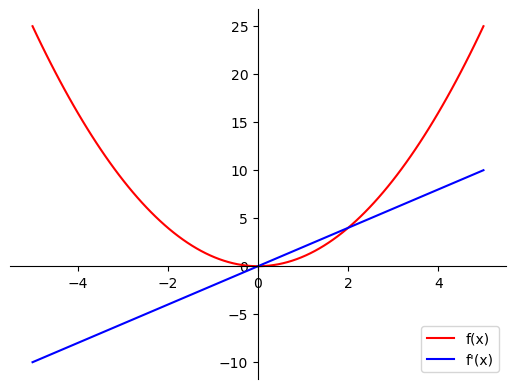

In [53]:
plot_funcs(f_symb_numpy, dfdx_symb_numpy)

### Limitations of Symbolic Differentiation

In [54]:
dfdx_abs = sympy.diff(abs(x),x)
dfdx_abs

(re(x)*Derivative(re(x), x) + im(x)*Derivative(im(x), x))*sign(x)/x

In [55]:
dfdx_abs.evalf(subs={x:-2})

-Subs(Derivative(re(x), x), x, -2)

In [56]:
dfdx_abs_numpy = lambdify(x, dfdx_abs,'numpy')

try:
    dfdx_abs_numpy(np.array([1, -2, 0]))
except NameError as err:
    print(err)

name 'Derivative' is not defined


### Numerical Differentiation with NumPy

#### find the derivative of function 𝑓(𝑥)=𝑥2 defined above. The first argument is an array of function values, the second defines the spacing Δ𝑥 for the evaluation.

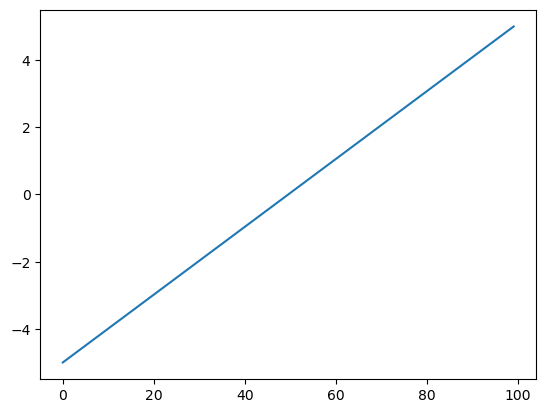

In [73]:
mat2 = np.linspace(-5, 5, 100)
plt.plot(mat2)
plt.show()

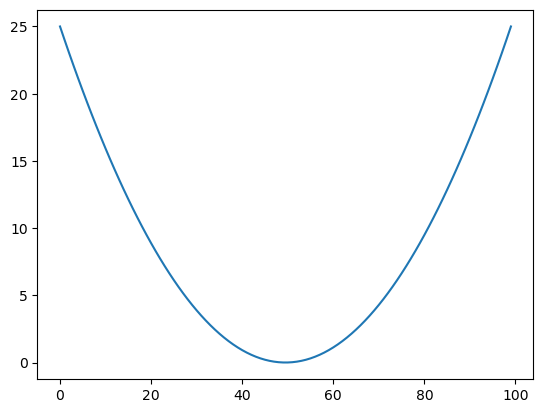

In [74]:
mat2_ = power_f(mat2)
plt.plot(mat2_)
plt.show()

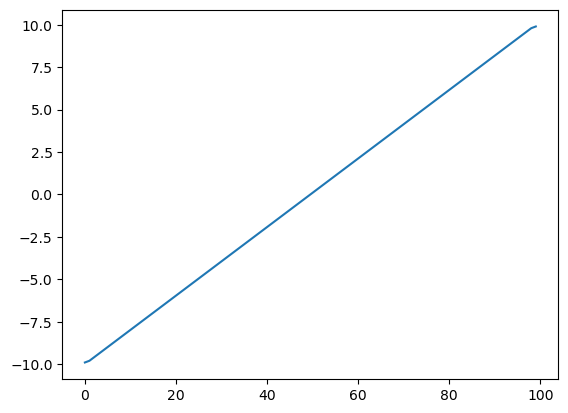

In [75]:
grads = np.gradient(mat2_, mat2)
plt.plot(grads)
plt.show()

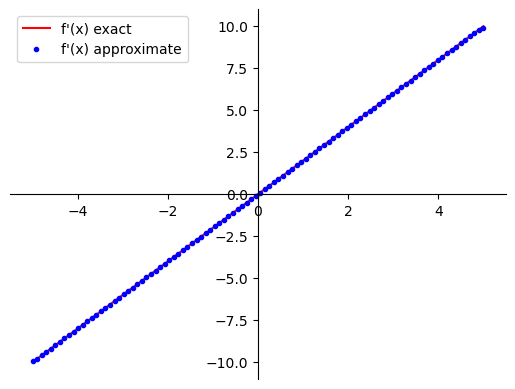

In [76]:
plot_funcs(dfdx_symb_numpy, grads, label1="f'(x) exact", label2="f'(x) approximate")

#### neumerical differentiation  of more complicated function

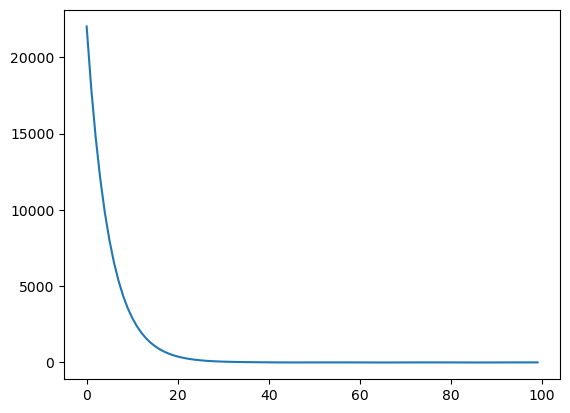

In [77]:
def f_composed(x):
    return np.exp(-2*x) + 3*np.sin(3*x)

mat2__ = f_composed(mat2)
plt.plot(mat2__)
plt.show()

#plot_f1_and_f2(lambdify(x, dfdx_composed, 'numpy'), np.gradient(f_composed(x_array_2), x_array_2),
             # label1="f'(x) exact", label2="f'(x) approximate")

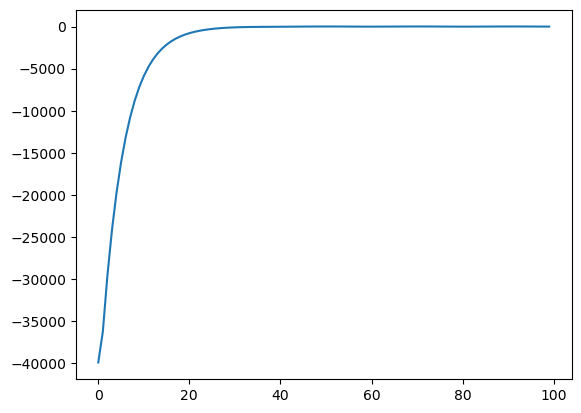

In [78]:
grads_ = np.gradient(mat2__, mat2)
plt.plot(grads_)
plt.show()

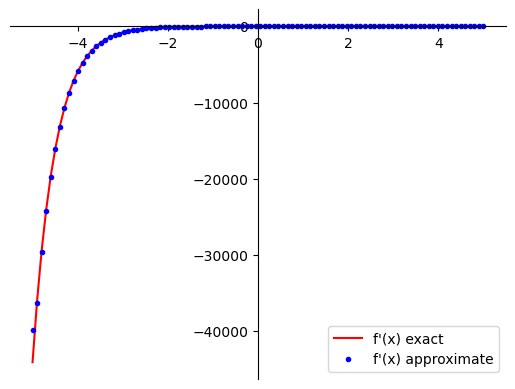

In [85]:
plot_funcs(lambdify(x, dfdx_composed, 'numpy'), grads_, label1="f'(x) exact", label2="f'(x) approximate")

#### Limitations of Numerical Differentiation

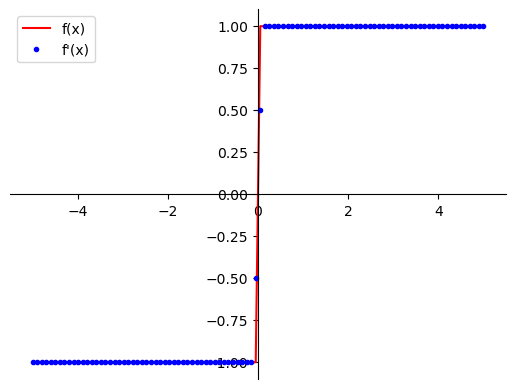

In [86]:
def dfdx_abs(x):
    if x > 0:
        return 1
    else:
        if x < 0:
            return -1
        else:
            return None

plot_funcs(np.vectorize(dfdx_abs), np.gradient(abs(mat2), mat2))

####  the results near the "jump" are 0.5 and −0.5, while they should be 1 and −1. These cases can give significant errors in the computations

#### Automatic Differentiation with `jax`

Automatic differentiation (autodiff) method breaks down the function into common functions (𝑠𝑖𝑛, 𝑐𝑜𝑠, 𝑙𝑜𝑔, power functions, etc.), and constructs the computational graph consisting of the basic functions. Then the chain rule is used to compute the derivative at any node of the graph. It is the most commonly used approach in machine learning applications and neural networks, as the computational graph for the function and its derivatives can be built during the construction of the neural network, saving in future computations.

The main disadvantage of it is implementational difficulty. However, nowadays there are libraries that are convenient to use, such as MyGrad, Autograd and JAX. Autograd and JAX are the most commonly used in the frameworks to build neural networks. JAX brings together Autograd functionality for optimization problems, and XLA (Accelerated Linear Algebra) compiler for parallel computing.

In [88]:
from jax import grad, vmap
from jax import numpy as jnp 

In [94]:
mat3 = jnp.array([2, 4, 5, 6, 9], dtype=np.dtype(float))
print(type(mat3))
print(type(mat2))

<class 'jaxlib.xla_extension.ArrayImpl'>
<class 'numpy.ndarray'>


/tmp/ipykernel_13711/1854932869.py:1: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  mat3 = jnp.array([2, 4, 5, 6, 9], dtype=np.dtype(float))


In [95]:
print(mat3.dtype)

float32


In [99]:
mat3 = mat3.at[3].set(1999.0)
print(mat3)

[   2.    4.    5. 1999.    9.]


The following code will calculate the derivative of the previously defined function 𝑓(𝑥)=𝑥2 at the point 𝑥=3:

In [102]:
print(power_f(3))
print(grad(power_f)(3.0))

9
6.0


In [103]:
try:
    grad(power_f)(3)
except TypeError as err:
    print(err)

grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got int32. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.


In [104]:
try:
    grad(power_f)(mat3)
except TypeError as err:
    print(err)

Gradient only defined for scalar-output functions. Output had shape: (5,).


In [105]:
print(vmap(power_f)(mat3))

[4.000000e+00 1.600000e+01 2.500000e+01 3.996001e+06 8.100000e+01]


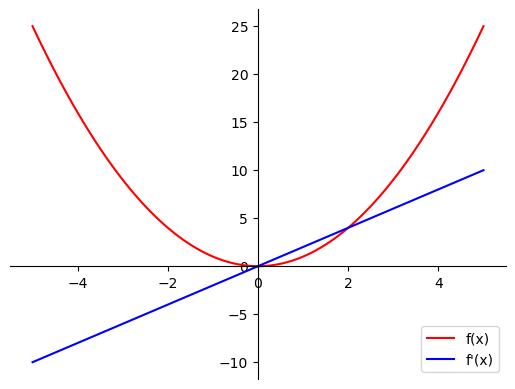

In [106]:
plot_funcs(power_f, vmap(grad(power_f)))

#### Computational Efficiency of Symbolic, Numerical and Automatic Differentiation

In [115]:
import timeit, time

x_array_large = np.linspace(-5, 5, 1000000)

tic_symb = time.time()
res_symb = lambdify(x, sympy.diff(power_f(x),x),'numpy')(x_array_large)
toc_symb = time.time()
time_symb = 1000 * (toc_symb - tic_symb)  # Time in ms.

tic_numerical = time.time()
res_numerical = np.gradient(power_f(x_array_large),x_array_large)
toc_numerical = time.time()
time_numerical = 1000 * (toc_numerical - tic_numerical)

tic_jax = time.time()
res_jax = vmap(grad(power_f))(jnp.array(x_array_large.astype('float32')))
toc_jax = time.time()
time_jax = 1000 * (toc_jax - tic_jax)

print(f"Results\nSymbolic Differentiation:\n{res_symb}\n" + 
      f"Numerical Differentiation:\n{res_numerical}\n" + 
      f"Automatic Differentiation:\n{res_jax}")

print(f"\n\nTime\nSymbolic Differentiation:\n{time_symb} ms\n" + 
      f"Numerical Differentiation:\n{time_numerical} ms\n" + 
      f"Automatic Differentiation:\n{time_jax} ms")

Results
Symbolic Differentiation:
[-10.       -9.99998  -9.99996 ...   9.99996   9.99998  10.     ]
Numerical Differentiation:
[-9.99999 -9.99998 -9.99996 ...  9.99996  9.99998  9.99999]
Automatic Differentiation:
[-10.       -9.99998  -9.99996 ...   9.99996   9.99998  10.     ]


Time
Symbolic Differentiation:
3.747701644897461 ms
Numerical Differentiation:
36.76867485046387 ms
Automatic Differentiation:
4.716634750366211 ms


In [118]:
def f_polynomial_simple(x):
    return 2*x**3 - 3*x**2 + 5

def f_polynomial(x):
    for i in range(3):
        x = f_polynomial_simple(x)
    return x

tic_polynomial_symb = time.time()
res_polynomial_symb = lambdify(x, sympy.diff(f_polynomial(x),x),'numpy')(x_array_large)
toc_polynomial_symb = time.time()
time_polynomial_symb = 1000 * (toc_polynomial_symb - tic_polynomial_symb)

tic_polynomial_jax = time.time()
res_polynomial_jax = vmap(grad(f_polynomial))(jnp.array(x_array_large.astype('float32')))
toc_polynomial_jax = time.time()
time_polynomial_jax = 1000 * (toc_polynomial_jax - tic_polynomial_jax)

print(f"Results\nSymbolic Differentiation:\n{res_polynomial_symb}\n" + 
      f"Automatic Differentiation:\n{res_polynomial_jax}")

print(f"\n\nTime\nSymbolic Differentiation:\n{time_polynomial_symb} ms\n" +  
      f"Automatic Differentiation:\n{time_polynomial_jax} ms")

Results
Symbolic Differentiation:
[2.88570423e+24 2.88556400e+24 2.88542377e+24 ... 1.86202587e+22
 1.86213384e+22 1.86224181e+22]
Automatic Differentiation:
[2.8857043e+24 2.8855642e+24 2.8854241e+24 ... 1.8620253e+22 1.8621349e+22
 1.8622416e+22]


Time
Symbolic Differentiation:
285.7627868652344 ms
Automatic Differentiation:
25.6955623626709 ms
